In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [17]:
marathon_cologne_2018 = pd.read_csv("Data/marathon_cologne_2018.csv").iloc[:,1:]
marathon_cologne_2019 = pd.read_csv("Data/marathon_cologne_2019.csv").iloc[:,1:]

First combine 2018 with 2019 results:

In [18]:
marathon_cologne_2018['year']=2018
marathon_cologne_2019['year']=2019

In [164]:
marathon_cologne_df = marathon_cologne_2018.append(marathon_cologne_2019)

In [165]:
marathon_cologne_df.head()

,overall_place,bib,name,birth_year,nationality,club,gender_place,age_group_place,netto_time,brutto_time,5km,10km,15km,hm,25km,30km,35km,40km,year
0,1.,1,Tobias BLUM*,1995,GER,LC Rehlingen,1. M,1. Elite,2:16:55,2:16:57,15:44,31:44,47:42,1:07:20,1:19:40,1:35:43,1:51:41,2:09:11,2018.0
1,2.,4,Marcin BLAZINSKI*,1988,GER,LG farbtex Nordschwarzwald,2. M,2. Elite,2:20:04,2:20:06,15:40,31:39,47:34,1:07:14,1:19:44,1:36:46,1:53:55,2:12:18,2018.0
2,3.,2,Dominik FABIANOWSKI*,1989,GER,ASV Köln,3. M,3. Elite,2:21:17,2:21:19,16:37,33:10,49:43,1:10:11,1:23:12,1:40:09,1:56:26,2:13:42,2018.0
3,4.,3,Christian SCHREINER*,1986,GER,LAZ Puma Rhein-Sieg,4. M,4. Elite,2:23:46,2:23:48,16:38,33:10,49:43,1:10:11,1:23:12,1:40:09,1:57:06,2:15:46,2018.0
4,5.,7,Nikki JOHNSTONE*,1984,GBR,ART-Düsseldorf,5. M,5. Elite,2:25:43,2:25:46,17:13,34:47,52:21,1:13:41,1:26:57,1:44:09,2:00:44,2:18:18,2018.0


Data cleaning: Set empty strings as missing values and remove disqualified runners from the results. Further, introduce a DNF dummy variable if the runner did not finish the marathon as well as converting all timings to seconds for easier processing and creating a gender variable

In [166]:
marathon_cologne_df = marathon_cologne_df.replace(r'^\s*$', np.nan, regex=True) #replace empty strings with nan

In [167]:
marathon_cologne_df = marathon_cologne_df[marathon_cologne_df['overall_place'] != "DSQ"] #remove DSQ's

In [168]:
marathon_cologne_df['dnf'] = np.where(marathon_cologne_df['overall_place']=='DNF', '1', '0')
marathon_cologne_df['overall_place'] = marathon_cologne_df['overall_place'].replace('DNF', np.nan) #replace DNF strings with nan



In [169]:
def convert_to_seconds(x):
    x = np.where(x.str.len() < 6,'0:' + x.astype(str), x)
    x = pd.Series(x)
    return pd.to_timedelta(x).dt.total_seconds()

time_cols = ['netto_time', 'brutto_time', '5km',
       '10km', '15km', 'hm', '25km', '30km', '35km', '40km']

marathon_cologne_df[time_cols] = marathon_cologne_df[time_cols].apply(convert_to_seconds, axis = 1)

In [170]:
marathon_cologne_df['gender'] = marathon_cologne_df['gender_place'].str[-1:]
marathon_cologne_df['gender_place'] = marathon_cologne_df['gender_place'].str[:-2]

In [171]:
marathon_cologne_df

,overall_place,bib,name,birth_year,nationality,club,gender_place,age_group_place,netto_time,brutto_time,...,10km,15km,hm,25km,30km,35km,40km,year,dnf,gender
0,1.,1,Tobias BLUM*,1995,GER,LC Rehlingen,1.,1. Elite,8215.0,8217.0,...,1904.0,2862.0,4040.0,4780.0,5743.0,6701.0,7751.0,2018.0,0,M
1,2.,4,Marcin BLAZINSKI*,1988,GER,LG farbtex Nordschwarzwald,2.,2. Elite,8404.0,8406.0,...,1899.0,2854.0,4034.0,4784.0,5806.0,6835.0,7938.0,2018.0,0,M
2,3.,2,Dominik FABIANOWSKI*,1989,GER,ASV Köln,3.,3. Elite,8477.0,8479.0,...,1990.0,2983.0,4211.0,4992.0,6009.0,6986.0,8022.0,2018.0,0,M
3,4.,3,Christian SCHREINER*,1986,GER,LAZ Puma Rhein-Sieg,4.,4. Elite,8626.0,8628.0,...,1990.0,2983.0,4211.0,4992.0,6009.0,7026.0,8146.0,2018.0,0,M
4,5.,7,Nikki JOHNSTONE*,1984,GBR,ART-Düsseldorf,5.,5. Elite,8743.0,8746.0,...,2087.0,3141.0,4421.0,5217.0,6249.0,7244.0,8298.0,2018.0,0,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4812,NaN,213,Rene GRASS,1967,GER,Rhein-Berg Runners,DNF,DNF M50,NaN,NaN,...,2577.0,3878.0,5686.0,NaN,NaN,NaN,NaN,NaN,1,M
4813,NaN,F203,Anja BERGTE,1966,GER,(Nieste),DNF,DNF W50,NaN,NaN,...,4788.0,7484.0,10858.0,NaN,NaN,NaN,NaN,NaN,1,W
4814,NaN,F171,Karin MARKERT,1974,GER,Team Klinikum Nürnberg,DNF,DNF W45,NaN,NaN,...,3497.0,5344.0,7561.0,9231.0,NaN,NaN,NaN,NaN,1,W
4815,NaN,610,Jörg VOGEL,1969,GER,(Köln),DNF,DNF M50,NaN,NaN,...,3512.0,5338.0,7715.0,9420.0,11804.0,NaN,NaN,NaN,1,M


Plot the number of DNFs and also see where runners stopped (including missing timings, eg. see higher share of missing values for 5km than 10km):  

It seems like there is a strong in crease of runners stopping after the half-way mark!

In [172]:
percent_missing = marathon_cologne_df[time_cols].isnull().sum() * 100 / len(marathon_cologne_df)
missing_value_df = pd.DataFrame({'column_name': time_cols,
                                 'percent_missing': percent_missing})

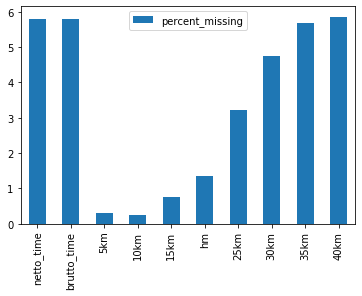

In [173]:
missing_value_df.plot(kind="bar")

Investigate the missing timings of runner who did finish the marathon but don't have a timing for the 40km checkpoint:

In [174]:
marathon_cologne_df[(pd.isnull(marathon_cologne_df['netto_time']) == False) &
                    (pd.isnull(marathon_cologne_df['40km']) == True)] #runners with missing timings at 40km, despite finishing

,overall_place,bib,name,birth_year,nationality,club,gender_place,age_group_place,netto_time,brutto_time,...,10km,15km,hm,25km,30km,35km,40km,year,dnf,gender
306,307.,23898,Dennis SCHÄFER,1992,GER,(Aachen),288.,41. MHK,11376.0,11399.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,0,M
722,723.,21799,Jonas EICKMANN,1986,GER,(Frechen),684.,140. M30,12391.0,12443.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,0,M
800,801.,16452,Markus KERSTJENS,1979,GER,(Goch),757.,137. M35,12482.0,12559.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,0,M
1269,1270.,3932,Mark MCGINLEY,1973,GBR,(Belfast),1158.,176. M45,13199.0,13425.0,...,3203.0,4791.0,NaN,7957.0,9510.0,11000.0,NaN,2018.0,0,M
1366,1367.,12358,Guido STEINMETZ,1962,GER,(Stolberg),1240.,69. M55,13337.0,13694.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,0,M
2058,2059.,4129,Volker KADLER,1965,GER,Osendorfer Wölfe,1782.,232. M50,14101.0,14155.0,...,3256.0,4835.0,6743.0,7958.0,12208.0,11283.0,NaN,2018.0,0,M
3797,3798.,1145,Marcus IBALD,1968,GER,Roadrunners Heimbach-Weis,3060.,437. M50,16458.0,17213.0,...,3810.0,5714.0,8051.0,NaN,11383.0,13408.0,NaN,2018.0,0,M
4557,4558.,F25031,Anke FRANKEN,1976,GER,Irrecrew,1011.,155. W40,18708.0,19468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0,0,W
1868,1869.,4268,Wolfgang BLAESER,1968,GER,MST Laufpoint,1579.,197. M50,14703.0,15088.0,...,3351.0,5001.0,7069.0,NaN,10125.0,11857.0,NaN,NaN,0,M
1959,1960.,8192,Alex SHESTEROV,1982,GER,(Köln),1647.,268. M35,14862.0,15232.0,...,2907.0,4380.0,6313.0,NaN,9700.0,11712.0,NaN,NaN,0,M


In [274]:
marathon_cologne_df.to_csv("marathon_cologne_complete.csv")